# Introduction

In this project, we'll try to predict car prices based on a dataset containing technical aspects of different cars. We'll use K-nearest neighbors and try to select the best features along with optimal number of neighbors to give us the best prediction we can muster (and we'll define "best" as the lowest root mean squared error when we use cross validation to determine how well our model performs).

The dataset we will be working with can be found at the link below:
> Dataset link: https://archive.ics.uci.edu/ml/datasets/automobile

With that, let's read in our dataset and get to it!

In [48]:
# import our needed libraries
import pandas as pd
import numpy as np

# show all of our columns since we only have 26
pd.set_option('display.max_columns', None)

# looks like our dataset does not have columns baked in
# so, let's add them in ourselves based off what is in the dataset's documentation
columns = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors',
          'body_style','drive_wheels','engine_location','wheel_base','length','width','height',
          'curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke',
          'compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

# read in our dataset
cars = pd.read_csv("imports-85.data",header=None,names=columns)

# look at the first few rows of our dataset
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [49]:
cars.shape

(205, 26)

# Data Cleaning - Removing missing values and normalizing numeric values

For predictive modeling, we can't have any missing values. We see the normalized_losses column has a few "?"'s for values, so we'll need to see if we can replace those and other null values within the dataset with perhaps average values from that column or drop the row (or even the column) entirely.

We'll also make the numeric columns a numeric data type. That way, we'll be able to find the mean squared error of our model to determine its performance for the numeric columns we use as a features.

From there, we'll also need to normalize our numeric columns' values to between 0 and 1 since numbers on differing scales can have a larger or smaller impact on the model's prediction purely just because there are larger or smaller numbers used.

In [50]:
# remove the ? values from all of our columns and replace it with nan
cars = cars.replace('?',np.nan)

# check that there are no more '?' in normalized_losses for instance
cars[cars["normalized_losses"]=='?'].shape[0]

0

Now let's convert our numeric columns to a numeric datatype.

In [51]:
# convert our numeric columns to numeric types
columns_to_make_float = ["normalized_losses","wheel_base","length","width","height","curb_weight","engine_size","bore","stroke","compression_ratio",
                        "horsepower","peak_rpm","city_mpg","highway_mpg","price"]
cars[columns_to_make_float] = cars[columns_to_make_float].astype('float')

# show the datatypes
cars.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight          float64
engine_type           object
num_of_cylinders      object
engine_size          float64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg             float64
highway_mpg          float64
price                float64
dtype: object

Let's look at normalized_losses now and see how we should handle the missing data.

In [52]:
# see how many missing values there are in normalized_losses compared to total values
cars["normalized_losses"].value_counts(normalize=True,dropna=False) * 100

NaN       20.000000
 161.0     5.365854
 91.0      3.902439
 150.0     3.414634
 104.0     2.926829
 134.0     2.926829
 128.0     2.926829
 94.0      2.439024
 74.0      2.439024
 85.0      2.439024
 103.0     2.439024
 168.0     2.439024
 95.0      2.439024
 102.0     2.439024
 65.0      2.439024
 93.0      1.951220
 148.0     1.951220
 106.0     1.951220
 122.0     1.951220
 118.0     1.951220
 83.0      1.463415
 154.0     1.463415
 125.0     1.463415
 137.0     1.463415
 101.0     1.463415
 115.0     1.463415
 89.0      0.975610
 110.0     0.975610
 145.0     0.975610
 119.0     0.975610
 197.0     0.975610
 164.0     0.975610
 108.0     0.975610
 188.0     0.975610
 129.0     0.975610
 81.0      0.975610
 192.0     0.975610
 158.0     0.975610
 153.0     0.975610
 87.0      0.975610
 194.0     0.975610
 113.0     0.975610
 121.0     0.487805
 98.0      0.487805
 186.0     0.487805
 78.0      0.487805
 107.0     0.487805
 77.0      0.487805
 90.0      0.487805
 256.0     0.487805


## Data Cleaning Continued - Looking at missing values and what to do with them

It looks like 20% of the "normalized_losses" values are missing. If we remove these records, that would bring our 205 rows of data down to roughly 160. We don't have a lot of data to work with as it is, but maybe these rows with missing normalized_losses values have missing values in other columns as well. If that's the case, it would make sense to drop these rows of data altogether. If that's not the case, we'll see what the average "normalized_losses" would give us, and if there's a relatively small standard deviation, we'll go with that.

In [53]:
# check other columns that are missing data with the records that are missing values for normalized_losses
cars[cars["normalized_losses"].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,ohc,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954.0,ohc,five,136.0,mpfi,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053.0,ohc,five,131.0,mpfi,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3055.0,ohc,six,164.0,mpfi,3.31,3.19,9.0,121.0,4250.0,20.0,25.0,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230.0,ohc,six,209.0,mpfi,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380.0,ohc,six,209.0,mpfi,3.62,3.39,8.0,182.0,5400.0,16.0,22.0,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505.0,ohc,six,209.0,mpfi,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,36880.0


From the above, I see very few rows (like 3) with missing values in the price, peak_rpm, and/or horsepower columns. Since there might be other valuable information in these other columns that we might use for our features, we won't drop these rows. Instead, let's see what happens when we provide the average.

Let's look and see how many other columns have missing values real quick.

In [54]:
# check how many other columns have missing values
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null float64
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         203 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null float64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null float64
fuel_system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    205 non-null float64
horsepower           203 

Looks like the following have missing values (# of missing values in parenthesis:
- normalized_losses (41)
- num_of_doors (2)
- bore (4)
- stroke (4)
- horsepower (2)
- peak_rpm (2)
- price (4)

With that, let's deal with the missing values for each column above.

# Really looking at that normalized_losses column

For normalized_losses, first off, what is this column trying to tell us? According to the link below with information on the dataset, normalized_losses refers to the "relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year." 

To be honest, I wasn't sure what this definition meant by "loss," so I looked up what this meant in reference to insurance, and I found the below definition: 
"a loss is any injury or damage that the insured suffers because of a covered accident or misfortune."

What I'm getting from that is, since this dataset contains information from the Insurance Collision Report, we have the average amount provided by insurance companies to cover issues that the insurance company expressly covers. 

What immediately comes to mind is that, from my knowledge, sports car convertibles are fun to drive, and folks who own them may like to go fast. As a result, there may be a higher chance for accidents associated with this red sports car convertible, which would result in more insurance payments if the accidents are covered, which means more "losses."

All of this is to say, do we even care about this column anyway for seeing if we can predict the price of cars? Well, at this point, I think so since from my example above, sports car convertibles are usually priced higher than your average sedan, so perhaps this column could help us in our predictions. Let's see what the average values and standard deviation values look like for our normalized_losses column and others as well.

> Source for normalized_losses definition: https://archive.ics.uci.edu/ml/datasets/automobile

> Source for "loss" definition in an insurance context: https://www.sapling.com/6463380/definition-loss-insurance

In [55]:
# check the mean and std dev of each of our normalized_losses column with missing values
normalized_losses_mean = cars["normalized_losses"].mean()
normalized_losses_std = cars["normalized_losses"].std()
print("normalized_losses mean: " + str(normalized_losses_mean) + "\n" + "normalized_losses std dev: " + str(normalized_losses_std))

normalized_losses mean: 122.0
normalized_losses std dev: 35.442167530553256


Looking at a loss average of 122 with a standard deviation of roughly 35.44. Seems reasonable, but this is also in 1985 dollars, so using 

2019 dollars:
- 122 = 291.79
- 35.44 = 84.76

I think it works. For normalized_losses, we'll replace the null values with the mean and std dev (in 1985 dollars) that we found above.

> Source for converting 1985 dollars to 2019 dollars:
https://www.in2013dollars.com/us/inflation/1985?amount=35.44

In [56]:
# make the missing values in normalized_losses = the mean
cars["normalized_losses"].fillna(value=normalized_losses_mean, inplace=True)

# check to make sure that there are no more nan's
cars["normalized_losses"].isna().sum()

0

With the missing values in the normalized_losses column dealt with, let's turn to our next column that might be useful to our feature selection - num_of_doors. This column is currently a text column, so let's convert it to a numeric column and see how we can deal with the missing values.

In [57]:
# create a mapping of the values in the num_of_doors column
mapping = {
    'two':2,
    'four':4
}

# pop in the numbers into the column
cars["num_of_doors"] = cars["num_of_doors"].map(mapping)

# check the count of records per number of doors.
cars["num_of_doors"].value_counts(dropna=False)

 4.0    114
 2.0     89
NaN       2
Name: num_of_doors, dtype: int64

It looks like there are only two missing values. Let's see if we can just fill in the blank for the cars listed from a quick search.

In [58]:
# check the cars that have mising values for number of doors
cars[cars["num_of_doors"].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191.0,ohc,four,98.0,mpfi,3.03,3.39,7.6,102.0,5500.0,24.0,30.0,8558.0
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443.0,ohc,four,122.0,idi,3.39,3.39,22.7,64.0,4650.0,36.0,42.0,10795.0


From checking the below site, sedans generally have four doors. Since these two cars are sedans, we'll put them down for four doors and then make the column an int data type.

In [59]:
# fill the nan's with 4 and make the column an int
cars["num_of_doors"].fillna(value=4,inplace=True)
cars["num_of_doors"] = cars["num_of_doors"].astype('int64')
cars["num_of_doors"].value_counts()

4    116
2     89
Name: num_of_doors, dtype: int64

With the num_of_doors column cleaned, let's now turn our attention to the "bore" and "stroke" columns. From a quick search, I found these to mean the below:
- **Bore** is the diameter of each cylinder 
- **Stroke** is the length that it travels when moving from bottom position to the top position

These could potentially affect the price of a car! Let's clean up these columns.
> Source for bore and stroke definitions: https://mechanics.stackexchange.com/questions/24969/what-is-meant-by-bore-and-stroke

In [60]:
# Check which rows have bore and stroke missing again
cars[cars["bore"].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
55,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380.0,rotor,two,70.0,4bbl,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,10945.0
56,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380.0,rotor,two,70.0,4bbl,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,11845.0
57,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385.0,rotor,two,70.0,4bbl,NaN,NaN,9.4,101.0,6000.0,17.0,23.0,13645.0
58,3,150.0,mazda,gas,std,2,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500.0,rotor,two,80.0,mpfi,NaN,NaN,9.4,135.0,6000.0,16.0,23.0,15645.0


The four rows that are missing the "bore" value are also missing the "stroke" value. Let's see what the average and std dev of each column looks like.

In [61]:
# Get the average of bore and stroke
bore_average = cars["bore"].mean()
stroke_average = cars["stroke"].mean()
bore_std_dev = cars["bore"].std()
stroke_std_dev = cars["stroke"].std()

# show the averages
print("bore mean: " + str(bore_average) + "\n" +
      "bore std dev: " + str(bore_std_dev) + "\n" +
      "stroke mean: " + str(stroke_average) + "\n" +
      "stroke std dev: " + str(stroke_std_dev))

bore mean: 3.3297512437810943
bore std dev: 0.273538731829599
stroke mean: 3.255422885572139
stroke std dev: 0.3167174533770311


The mean and the std dev for bore and stroke look good to me. Let's replace the missing values for bore and stroke with their means.

In [62]:
# replace the nan's for bore and stroke with the respective column's mean
cars["bore"].fillna(value=bore_average,inplace=True)
cars["stroke"].fillna(value=stroke_average,inplace=True)

# check to make sure there are not anymore missing values for bore and stroke
cars[["bore","stroke"]].isna().sum()

bore      0
stroke    0
dtype: int64

Now that we have no more missing values for bore and stroke, Let's look at the horsepower column now! I have a little better idea about what this column refers to, so we'll just use the mean for the 2 missing values if it looks reasonable.

In [63]:
# check the missing values for the horsepower column
cars[cars["horsepower"].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
130,0,122.0,renault,gas,std,4,wagon,fwd,front,96.1,181.5,66.5,55.2,2579.0,ohc,four,132.0,mpfi,3.46,3.9,8.7,NaN,NaN,23.0,31.0,9295.0
131,2,122.0,renault,gas,std,2,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460.0,ohc,four,132.0,mpfi,3.46,3.9,8.7,NaN,NaN,23.0,31.0,9895.0


Peak_rpm is also missing for the two records that are missing horsepower. We'll also replace the peak_rpm with the mean if the std dev isn't too high.

In [64]:
# check the different values for horsepower
cars["horsepower"].value_counts(dropna=False)

 68.0     19
 70.0     11
 69.0     10
 116.0     9
 110.0     8
 95.0      7
 88.0      6
 114.0     6
 160.0     6
 101.0     6
 62.0      6
 82.0      5
 84.0      5
 97.0      5
 76.0      5
 145.0     5
 102.0     5
 86.0      4
 123.0     4
 111.0     4
 92.0      4
 121.0     3
 152.0     3
 73.0      3
 207.0     3
 85.0      3
 90.0      3
 182.0     3
 100.0     2
 112.0     2
 161.0     2
 176.0     2
NaN        2
 156.0     2
 56.0      2
 52.0      2
 155.0     2
 184.0     2
 162.0     2
 94.0      2
 48.0      1
 140.0     1
 115.0     1
 154.0     1
 142.0     1
 58.0      1
 60.0      1
 200.0     1
 78.0      1
 262.0     1
 135.0     1
 64.0      1
 120.0     1
 72.0      1
 134.0     1
 175.0     1
 288.0     1
 55.0      1
 143.0     1
 106.0     1
Name: horsepower, dtype: int64

In [65]:
# check the values for peak_rpm
cars["peak_rpm"].value_counts(dropna=False)

 5500.0    37
 4800.0    36
 5000.0    27
 5200.0    23
 5400.0    13
 6000.0     9
 4500.0     7
 5800.0     7
 5250.0     7
 4200.0     5
 4150.0     5
 4750.0     4
 4350.0     4
 5900.0     3
 4400.0     3
 5100.0     3
 4250.0     3
NaN         2
 6600.0     2
 4900.0     1
 5750.0     1
 5300.0     1
 5600.0     1
 4650.0     1
Name: peak_rpm, dtype: int64

In [66]:
# pull the means and std dev's for horsepower and peak rpm
horsepower_average = cars["horsepower"].mean()
peak_rpm_average = cars["peak_rpm"].mean()
horsepower_std_dev = cars["horsepower"].std()
peak_rpm_std_dev = cars["peak_rpm"].std()

# show the mean and std dev of both columns
print("horsepower mean: " + str(horsepower_average) + "\n" +
      "horsepower std dev: " + str(horsepower_std_dev) + "\n" +
     "peak rpm mean: " + str(peak_rpm_average) + "\n" + 
     "peak rpm std dev: " + str(peak_rpm_std_dev))

horsepower mean: 104.25615763546799
horsepower std dev: 39.71436878679358
peak rpm mean: 5125.369458128079
peak rpm std dev: 479.33455983341634


Those values look good to me. Let's replace the horsepower and peak_rpm missing valeus with the mean of those columns now. 

In [67]:
# replace the missing values of horsepower and peak_rpm with tehir mean values
cars["horsepower"].fillna(value=horsepower_average,inplace=True)
cars["peak_rpm"].fillna(value=peak_rpm_average,inplace=True)

# check to make sure there are no more missing values for horsepower and peak_rpm
cars[["horsepower","peak_rpm"]].isna().sum()

horsepower    0
peak_rpm      0
dtype: int64

Before we get on to the price column, we also have num_of_cylinders that we can potentially use as a feature. Let's convert the string values to numbers.

In [68]:
# check the different values for num_of_cylinders
cars["num_of_cylinders"].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [69]:
# create the mapping values
cylinders_mapping = {
    "four":4,
    "six":6,
    "five":5,
    "eight":8,
    "two":2,
    "three":3,
    "twelve":12
}

# replace the values
cars["num_of_cylinders"] = cars["num_of_cylinders"].map(cylinders_mapping)

# check the values again
cars["num_of_cylinders"].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num_of_cylinders, dtype: int64

In [70]:
# make num_of_cylinders an int now
cars["num_of_cylinders"] = cars["num_of_cylinders"].astype('int64')

With our num_of_cylinders column cleaned, we now can move forward with cleaning up the price column!

In [71]:
# check the rows where the price value is missing
cars[cars["price"].isna()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
9,0,122.0,audi,gas,turbo,2,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053.0,ohc,5,131.0,mpfi,3.13,3.40,7.0,160.0,5500.0,16.0,22.0,NaN
44,1,122.0,isuzu,gas,std,2,sedan,fwd,front,94.5,155.9,63.6,52.0,1874.0,ohc,4,90.0,2bbl,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,NaN
45,0,122.0,isuzu,gas,std,4,sedan,fwd,front,94.5,155.9,63.6,52.0,1909.0,ohc,4,90.0,2bbl,3.03,3.11,9.6,70.0,5400.0,38.0,43.0,NaN
129,1,122.0,porsche,gas,std,2,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366.0,dohcv,8,203.0,mpfi,3.94,3.11,10.0,288.0,5750.0,17.0,28.0,NaN


For the cars that are missing their prices, one is an Audi, two are Isuzu, and one is a Porsche. Rather than taking the mean price for the column, I think taking the mean price for each make and applying it to the corresponding row's value should work better.

In [72]:
# get the mean car prices and check the std dev
audi_mean = cars[cars["make"]=='audi']["price"].mean()
audi_std_dev = cars[cars["make"]=='audi']["price"].std()
isuzu_mean = cars[cars["make"]=='isuzu']["price"].mean()
isuzu_std_dev = cars[cars["make"]=='isuzu']["price"].std()
porsche_mean = cars[cars["make"]=='porsche']["price"].mean()
porsche_std_dev = cars[cars["make"]=='porsche']["price"].std()
overall_mean = cars["price"].mean()
overall_std_dev = cars["price"].std()

# print out each value
print("audi mean: " + str(audi_mean))
print("audi std dev: " + str(audi_std_dev))
print("isuzu mean: " + str(isuzu_mean))
print("isuzu std dev: " + str(isuzu_std_dev))
print("porsche mean: " + str(porsche_mean))
print("porsche std dev: " + str(porsche_std_dev))
print("")
print("overall mean: " + str(overall_mean))
print("overall std dev: " + str(overall_std_dev))

audi mean: 17859.166666666668
audi std dev: 3452.3794934315474
isuzu mean: 8916.5
isuzu std dev: 3014.396208198252
porsche mean: 31400.5
porsche std dev: 6528.7843431989695

overall mean: 13207.129353233831
overall std dev: 7947.066341939274


When looking at the means and std devs between the individual price means for each make and the overall price mean, I think it makes more sense to apply the individual price means by make.

In [73]:
# fill in the nan value for audi
cars.loc[(cars["make"]=='audi') & (cars["price"].isna()),"price"] = audi_mean

# check that there are no other nan's
cars[cars["make"]=='audi']["price"].value_counts(dropna=False)

17859.166667    1
23875.000000    1
17450.000000    1
18920.000000    1
17710.000000    1
15250.000000    1
13950.000000    1
Name: price, dtype: int64

In [74]:
# fill in the nan value for isuzu
cars.loc[(cars["make"]=='isuzu') & (cars["price"].isna()),"price"] = isuzu_mean

# check that there are no other nan's
cars[cars["make"]=='isuzu']["price"].value_counts(dropna=False)

8916.5     2
11048.0    1
6785.0     1
Name: price, dtype: int64

In [75]:
# fill in the nan value for porsche
cars.loc[(cars["make"]=='porsche') & (cars["price"].isna()),"price"] = porsche_mean

# check that there are no other nan's
cars[cars["make"]=='porsche']["price"].value_counts(dropna=False)

31400.5    1
37028.0    1
34028.0    1
32528.0    1
22018.0    1
Name: price, dtype: int64

With our prices now cleaned up, let's now rescale all of our numeric value columns from 0 to 1 so no one column has too much influence on how similar a car is to another just by how big the numbers of the column itself are.

In [76]:
# pick out the numeric columns that we want to normalize
columns_to_normalize = [
    "symboling",
    "normalized_losses",
    "num_of_doors",
    "wheel_base",
    "length",
    "width",
    "height",
    "curb_weight",
    "num_of_cylinders",
    "engine_size",
    "bore",
    "stroke",
    "compression_ratio",
    "horsepower",
    "peak_rpm",
    "city_mpg",
    "highway_mpg"
]

# normalize the columns
cars_normalized = (cars[columns_to_normalize] - cars[columns_to_normalize].mean()) / cars[columns_to_normalize].std()

# add back in the price column
cars_normalized["price"] = cars["price"]

# show the first five records of our normalized dataset
cars_normalized.head()

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.739213,0.000000,-1.138865,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,-0.352025,0.074267,0.517822,-1.834912,-0.287645,0.170647,-0.262841,-0.644974,-0.544725,13495.0
1,1.739213,0.000000,-1.138865,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,-0.352025,0.074267,0.517822,-1.834912,-0.287645,0.170647,-0.262841,-0.644974,-0.544725,16500.0
2,0.133183,0.000000,-1.138865,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,1.498364,0.602571,-2.398990,0.684245,-0.287645,1.258726,-0.262841,-0.950684,-0.689938,16500.0
3,0.936198,1.325715,0.873784,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.352025,-0.430023,-0.515985,0.461028,-0.035885,-0.057090,0.785423,-0.186409,-0.109087,13950.0
4,0.936198,1.325715,0.873784,0.106848,0.206750,0.229440,0.235366,0.515545,0.573169,0.218350,-0.515985,0.461028,-0.539405,0.271864,0.785423,-1.103540,-1.270789,17450.0


# Machine Learning - Univariate K-Nearest Neighbors Set Up

With our normalized dataset, let's now create a function that looks at each of our numeric features and see which is the closest to predicting our price.

In order to evaluate our model's performance, we'll make part of the data a training set and the remaining part the test set. We'll train our model using the training set, predict the prices of the test set, and find the root mean squared error of the price difference to determine the performance. If the root mean squared error is really low for a particular feature, we can use that as a starting point when developing a multivariate K-Nearest Neighbors model.

To build our train and test set for our univariate models, we'll do a simple holdout validation to speed up our analysis. We'll split half of our dataset into a training set, and the other half we'll make the test set. For each feature we select to create our model on, we'll train our model on the training set, and then we'll predict the prices of the test set. We'll then calculate the root mean squared error (RMSE) of this run. From there, the training set and test set will switch roles, so the training set from the first round will become the test set and vice-versa. That will give us a root mean squared error as well, so with our two root mean squared errors, we'll then take the average of the two, and we'll move on to the next feature to do the same. After we look through all of our features, we'll then compare the RMSE of all of our runs to see which feature gives us the best prediction of price by itself.

In [77]:
# import our needed libraries from scikit.learn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# create a function for building a K-nearest neighbor model from a feature and return the RMSE
def knn_train_test(feature_col_name, target_col_name, dataset):
    # first we'll randomize our dataset. Let's create a random ordering of indexes with a range of the size of our dataset
    dataset_length = dataset.shape[0]
    random_ordering_of_indexes = np.random.permutation(dataset_length)
    dataset_random_order = dataset.iloc[random_ordering_of_indexes]
    
    # with our dataset randomized, let's create our training and test sets
    dataset_length_first_half = round(dataset_length / 2)
    dataset_length_second_half = dataset_length - dataset_length_first_half
    train_set_1 = dataset_random_order.head(dataset_length_first_half)
    test_set_1 = dataset_random_order.tail(dataset_length_second_half)
    
    # instantiate KNeighborsRegressor, fit our model, predict our prices, and determine the rmse
    knn = KNeighborsRegressor()
    knn.fit(train_set_1[[feature_col_name]],train_set_1[target_col_name])
    predictions_1 = knn.predict(test_set_1[[feature_col_name]])
    mse_1 = mean_squared_error(test_set_1[target_col_name],predictions_1)
    rmse_1 = np.sqrt(mse_1)
    
    # now let's switch the train_set and the test_set
    train_set_2 = test_set_1
    test_set_2 = train_set_1
    
    # instantiate another KNeighborsRegressor and perform the same calculations above to get our second rmse
    knn_2 = KNeighborsRegressor()
    knn_2.fit(train_set_2[[feature_col_name]],train_set_2[target_col_name])
    predictions_2 = knn_2.predict(test_set_2[[feature_col_name]])
    mse_2 = mean_squared_error(test_set_2[target_col_name],predictions_2)
    rmse_2 = np.sqrt(mse_2)
    
    # return the average rmse value
    avg_rmse = (rmse_1 + rmse_2) / 2
    return avg_rmse

rmse_test = knn_train_test("symboling","price",cars_normalized)
print(rmse_test)

7687.536281377707


In [78]:
# let's now try to find all of the rmse's of each of the features
feature_col_list = list(cars_normalized.columns)
feature_col_list.remove("price")
feature_rmse_compare_dict = {}
for col in feature_col_list:
    rmse = knn_train_test(col,"price",cars_normalized)
    feature_rmse_compare_dict[col] = rmse
feature_rmse_compare_dict

{'bore': 7709.076120547684,
 'city_mpg': 5060.943396832523,
 'compression_ratio': 6186.246643643286,
 'curb_weight': 4287.037292164061,
 'engine_size': 4183.074236574776,
 'height': 8344.280238910706,
 'highway_mpg': 4504.178959505128,
 'horsepower': 4113.5744250666985,
 'length': 5304.427970306032,
 'normalized_losses': 7702.939557941688,
 'num_of_cylinders': 5687.946962762769,
 'num_of_doors': 8261.44219906292,
 'peak_rpm': 7832.790810965815,
 'stroke': 7461.977937352085,
 'symboling': 8732.36080532016,
 'wheel_base': 5858.823209437327,
 'width': 5353.5389961045485}

In [79]:
# get the min rmse from the above dictionary
feature_with_min_rmse = min(feature_rmse_compare_dict, key=feature_rmse_compare_dict.get)
feature_with_min_rmse

'horsepower'

# And the winning feature column for our univariate K-Nearest Neighbors model is...

Engine size! That seems to make sense to me intuitively as I believe from my limited knowledge about cars that the engine is the most complex piece of car equipment, and the bigger it is, the more it could potentially house more complexity. More complexity would likely equal a longer time/more careful attention needed to produce the vehicle, and time is money.

# Hyperparemeter Optimization - Modifying the K-value

Let's try out changing the nearest neighbors "k" to see if we end up with the same answer.

In [80]:
# Modify the function we created to accept a "k" value as well
# create a function for building a K-nearest neighbor model from a feature and return the RMSE
def knn_train_test_k_value(feature_col_name, target_col_name, dataset, k_value):
    # first we'll randomize our dataset. Let's create a random ordering of indexes with a range of the size of our dataset
    dataset_length = dataset.shape[0]
    random_ordering_of_indexes = np.random.permutation(dataset_length)
    dataset_random_order = dataset.iloc[random_ordering_of_indexes]
    
    # with our dataset randomized, let's create our training and test sets
    dataset_length_first_half = round(dataset_length / 2)
    dataset_length_second_half = dataset_length - dataset_length_first_half
    train_set_1 = dataset_random_order.head(dataset_length_first_half)
    test_set_1 = dataset_random_order.tail(dataset_length_second_half)
    
    # instantiate KNeighborsRegressor, fit our model, predict our prices, and determine the rmse
    knn = KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(train_set_1[[feature_col_name]],train_set_1[target_col_name])
    predictions_1 = knn.predict(test_set_1[[feature_col_name]])
    mse_1 = mean_squared_error(test_set_1[target_col_name],predictions_1)
    rmse_1 = np.sqrt(mse_1)
    
    # now let's switch the train_set and the test_set
    train_set_2 = test_set_1
    test_set_2 = train_set_1
    
    # instantiate another KNeighborsRegressor and perform the same calculations above to get our second rmse
    knn_2 = KNeighborsRegressor()
    knn_2.fit(train_set_2[[feature_col_name]],train_set_2[target_col_name])
    predictions_2 = knn_2.predict(test_set_2[[feature_col_name]])
    mse_2 = mean_squared_error(test_set_2[target_col_name],predictions_2)
    rmse_2 = np.sqrt(mse_2)
    
    # return the average rmse value
    avg_rmse = (rmse_1 + rmse_2) / 2
    return avg_rmse

In [81]:
# for engine_size, run our function to see which k-value is optimal for our price
k_values = [1,3,5,7,9]
rmse_results = []
for k in k_values:
    rmse = knn_train_test_k_value("engine_size","price",cars_normalized,k)
    rmse_results.append(rmse)
print(rmse_results)

[3366.399898656675, 3182.678834931196, 3363.9813685633953, 3496.9213884092424, 3983.903382538987]


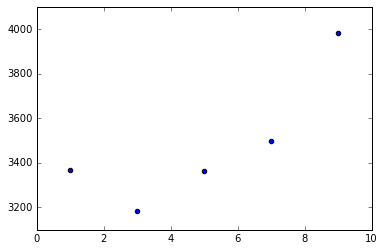

In [82]:
# visualize our results to see what has the lowest rmse
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=k_values, y=rmse_results)

It appears just using one neighbor gives us the best performance for engine_size. Interesting. Let's try multivariate models to see if we can get an even lower root mean squared error for our model.

# Machine Learning - Multivariate K-Nearest Neighbors Set Up

Going down the univariate path gave us a dictionary on how each feature performed, so let's see if we can use the top features together to make a model that is even better at predicting a car's price. We'll keep the default k-value of five for now.

In [83]:
# Modify the function to accept multiple features
def knn_train_test_multiple_features(feature_list, target_col_name, dataset):
    # first we'll randomize our dataset. Let's create a random ordering of indexes with a range of the size of our dataset
    dataset_length = dataset.shape[0]
    random_ordering_of_indexes = np.random.permutation(dataset_length)
    dataset_random_order = dataset.iloc[random_ordering_of_indexes]
    
    # with our dataset randomized, let's create our training and test sets
    dataset_length_first_half = round(dataset_length / 2)
    dataset_length_second_half = dataset_length - dataset_length_first_half
    train_set_1 = dataset_random_order.head(dataset_length_first_half)
    test_set_1 = dataset_random_order.tail(dataset_length_second_half)
    
    # instantiate KNeighborsRegressor, fit our model, predict our prices, and determine the rmse
    knn = KNeighborsRegressor()
    knn.fit(train_set_1[feature_list],train_set_1[target_col_name])
    predictions_1 = knn.predict(test_set_1[feature_list])
    mse_1 = mean_squared_error(test_set_1[target_col_name],predictions_1)
    rmse_1 = np.sqrt(mse_1)
    
    # now let's switch the train_set and the test_set
    train_set_2 = test_set_1
    test_set_2 = train_set_1
    
    # instantiate another KNeighborsRegressor and perform the same calculations above to get our second rmse
    knn_2 = KNeighborsRegressor()
    knn_2.fit(train_set_2[feature_list],train_set_2[target_col_name])
    predictions_2 = knn_2.predict(test_set_2[feature_list])
    mse_2 = mean_squared_error(test_set_2[target_col_name],predictions_2)
    rmse_2 = np.sqrt(mse_2)
    
    # return the average rmse value
    avg_rmse = (rmse_1 + rmse_2) / 2
    return avg_rmse

In [84]:
# Use all of the features to see what we get
all_columns = list(cars_normalized.columns)
all_columns.remove("price")
rmse_all_columns = knn_train_test_multiple_features(all_columns,"price",cars_normalized)
print(rmse_all_columns)

4080.9320251026074


In [85]:
# Use the top 2 features to see what we get
top_two_features = ["engine_size","curb_weight"]
rmse_top_two = knn_train_test_multiple_features(top_two_features,"price",cars_normalized)
print(rmse_top_two)

3386.457954670127


In [86]:
# use the top 3 features to see what we get
top_three_features = ["engine_size","curb_weight","horsepower"]
rmse_top_three = knn_train_test_multiple_features(top_three_features,"price",cars_normalized)
print(rmse_top_three)

3714.328877798938


In [87]:
# use the top 4 features to see what we get
top_four_features = ["engine_size","curb_weight","horsepower","city_mpg"]
rmse_top_four = knn_train_test_multiple_features(top_four_features,"price",cars_normalized)
print(rmse_top_four)

3130.977260668107


In [88]:
# use the top 5 features to see what we get
top_five_features = ["engine_size","curb_weight","horsepower","city_mpg","width"]
rmse_top_five = knn_train_test_multiple_features(top_five_features,"price",cars_normalized)
print(rmse_top_five)

3435.7922223154433


# Multivariate K-Nearest Neighbor Models - Best Models Results

From the results from the above multivariate K-Nearest Neighbor Models above, it looks like our top three models are as follows:

- Four-feature model (engine_size, curb_weight, horsepower, city_mpg); RMSE: 3200.297
- Three-feature model (engine_size, curb_weight, horsepower); RMSE: 3355.636
- Five-feature model (engine_size, curb_weight, horsepower, city_mpg, width); RMSE: 3655.992

# Hyperparameter Optimization for our multivariate models

Let's now see which k-value would be best for our top three models above.

In [89]:
# Modify our above function to accept a k-value
def knn_train_test_multiple_features_k_value(feature_list, target_col_name, dataset, k_value):
    # first we'll randomize our dataset. Let's create a random ordering of indexes with a range of the size of our dataset
    dataset_length = dataset.shape[0]
    random_ordering_of_indexes = np.random.permutation(dataset_length)
    dataset_random_order = dataset.iloc[random_ordering_of_indexes]
    
    # with our dataset randomized, let's create our training and test sets
    dataset_length_first_half = round(dataset_length / 2)
    dataset_length_second_half = dataset_length - dataset_length_first_half
    train_set_1 = dataset_random_order.head(dataset_length_first_half)
    test_set_1 = dataset_random_order.tail(dataset_length_second_half)
    
    # instantiate KNeighborsRegressor, fit our model, predict our prices, and determine the rmse
    knn = KNeighborsRegressor(n_neighbors=k_value)
    knn.fit(train_set_1[feature_list],train_set_1[target_col_name])
    predictions_1 = knn.predict(test_set_1[feature_list])
    mse_1 = mean_squared_error(test_set_1[target_col_name],predictions_1)
    rmse_1 = np.sqrt(mse_1)
    
    # now let's switch the train_set and the test_set
    train_set_2 = test_set_1
    test_set_2 = train_set_1
    
    # instantiate another KNeighborsRegressor and perform the same calculations above to get our second rmse
    knn_2 = KNeighborsRegressor()
    knn_2.fit(train_set_2[feature_list],train_set_2[target_col_name])
    predictions_2 = knn_2.predict(test_set_2[feature_list])
    mse_2 = mean_squared_error(test_set_2[target_col_name],predictions_2)
    rmse_2 = np.sqrt(mse_2)
    
    # return the average rmse value
    avg_rmse = (rmse_1 + rmse_2) / 2
    return avg_rmse

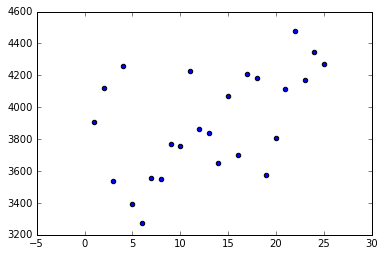

In [90]:
# for our four feature model, try out different k-values to see what works
k_value_range = range(1,26)
rmse_list = []
for k in k_value_range:
    rmse = knn_train_test_multiple_features_k_value(top_four_features,"price",cars_normalized,k)
    rmse_list.append(rmse)
plt.scatter(x=k_value_range,y=rmse_list)

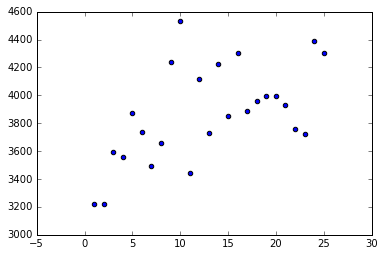

In [91]:
# for our three feature model, try out different k-values to see what works
k_value_range = range(1,26)
rmse_list = []
for k in k_value_range:
    rmse = knn_train_test_multiple_features_k_value(top_three_features,"price",cars_normalized,k)
    rmse_list.append(rmse)
plt.scatter(x=k_value_range,y=rmse_list)

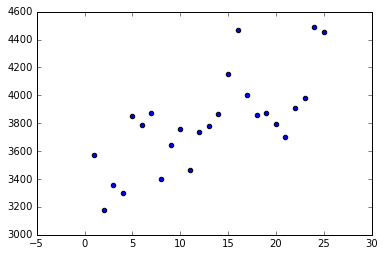

In [92]:
# for our five feature model, try out different k-values to see what works
k_value_range = range(1,26)
rmse_list = []
for k in k_value_range:
    rmse = knn_train_test_multiple_features_k_value(top_five_features,"price",cars_normalized,k)
    rmse_list.append(rmse)
plt.scatter(x=k_value_range,y=rmse_list)

# Optimal K-value Results

From our analysis above, we found the optimal k-values for each of our top three models to be the following:

- Four-feature model: 2
- Three-feature model: 3
- Five-feature model: 1

Some interesting numbers, and it looks like the more features we add, the less neighbors we look at. This might be because, though there may be a somewhat diverse array of car designs out there, there are ultimately some features that would give way to other features (e.g., a larger engine size could lead to higher horsepower and also a heavier curb weight).

# BONUS - Enhancing our function to perform cross validation instead of Hold Out Testing

Let's see what kind of models we get when we do cross validation instead of hold out testing. We'll do cross validation with 5 folds, where 4 folds (roughly 160 records of the roughly 200 record dataset) will be the training set, and then the 5th fold of roughly 40 records will be used as our test set where we see how well our model predicts a car's price compared to the price that we have in the test fold.

Each fold will have a go at being the test fold, so since there are five folds, we'll run the model for each feature five times, and we'll take the average of the root mean squared error (RMSE). The feature with the lowest average RMSE will be the one that performs the best. As a note, we'll just use the default value for finding the nearest neighbors k for the first round, which is five.



In [137]:
# bring out the cross_val_score and KFold class
from sklearn.model_selection import cross_val_score, KFold

# Modify our above function to accept a k-value
def knn_train_test_cross_val(feature_list, target_col_name, dataset, k_value):
    
    # instantiate another KNeighborsRegressor and perform the same calculations above to get our second rmse
    knn = KNeighborsRegressor(n_neighbors=k_value)
    
    # instantiate a KFold class with 5 folds and instantiate KNeighborsRegressor
    k_fold = KFold(n_splits=5,shuffle=True,random_state=1)
    
    # get our list of mean squared errors from each fold test
    mses = cross_val_score(knn, dataset[feature_list],dataset[target_col_name],scoring="neg_mean_squared_error",cv=k_fold)
    
    # return our average rmse across the different fold tests
    abs_mses = abs(mses)
    rmses = abs_mses ** (1/2)
    avg_rmse = np.mean(rmses)
    return avg_rmse

# four feature rmse value
four_feature_rmse = knn_train_test_cross_val(top_four_features,"price",cars_normalized,2)
print(four_feature_rmse)

2543.01643355933


In [132]:
# three feature rmse value
three_feature_rmse = knn_train_test_cross_val(top_three_features,"price",cars_normalized,2)
print(three_feature_rmse)

2787.0096333524625


In [129]:
# five feature rmse value
five_feature_rmse = knn_train_test_cross_val(top_five_features,"price",cars_normalized,3)
print(five_feature_rmse)

2689.3525107614905


# Conclusion

In this project, we looked at a 1985 dataset containing details such as engine size and price on a little over 200 cars. With this dataset, we set out to create a model that would be able to predict a car's price using machine learning. From scikit-learn, we used K-Nearest Neighbors to determine which cars are most similar to another car and determine its price based on those neighbors accordingly. 

From our analysis, we found that the following four fetaures give us the best prediction of how much a car costs. This makes sense as the engine is the most intricate part of a car, and the other features are affected by the engine size and can lead to a higher price:

- Engine size
- Curb weight
- Horsepower
- City mpg


It looks like the best model we could produce had roughly a 2543.02 root mean squared error on the pricing, meaning that would roughly translate to 6082.12 in today's dollars in error. Since the price from this dataset averaged to around 31,587.38 in today's (2019) dollars (source: https://www.in2013dollars.com/us/inflation/1985?amount=13207.13), and a standard deviation of 19,006.94 (2019) in today's dollars (source: https://www.in2013dollars.com/us/inflation/1985?amount=7947.07), our model performs much better than just taking the average price of a car and putting it on top of a car as our guess.

Thanks for joining along for the ride! Have a good one!